In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [4]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [5]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [7]:
!pip install -q findspark

In [8]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()

In [9]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [10]:
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

In [11]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [12]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



In [13]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [14]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [15]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [16]:
dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")

In [17]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [19]:
#Task1
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 7")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [20]:
#Task1
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


In [21]:
#Task2
medv_stats = spark.sql("""
    SELECT
        AVG(medv) AS avg,
        STDDEV(medv) AS sd,
        MIN(medv) AS min,
        MAX(medv) AS max
    FROM bostonh.bos_housing
""")
medv_stats.show();


+------------------+-----------------+---+----+
|               avg|               sd|min| max|
+------------------+-----------------+---+----+
|22.532806324110698|9.197104087379815|5.0|50.0|
+------------------+-----------------+---+----+



In [22]:
#Task2
avg_room = spark.sql("select AVG(RM) as avg FROM bostonh.bos_housing"
)
avg_room.show()

+-----------------+
|              avg|
+-----------------+
|6.284634387351787|
+-----------------+



In [24]:
#Task3
high_crim_rate = spark.sql("SELECT * FROM bostonh.bos_housing order by crim Desc LIMIT 1"
)
high_crim_rate.show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [25]:
#TASK3
low_value = spark.sql(
    "SELECT * FROM bostonh.bos_housing ORDER BY medv ASC LIMIT 1"
)
low_value.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



In [26]:
#TASK4
age_distribution = spark.sql("""
    SELECT age, COUNT(*) AS count
    FROM bostonh.bos_housing
    GROUP BY age
    ORDER BY age
""")
age_data = age_distribution.collect()


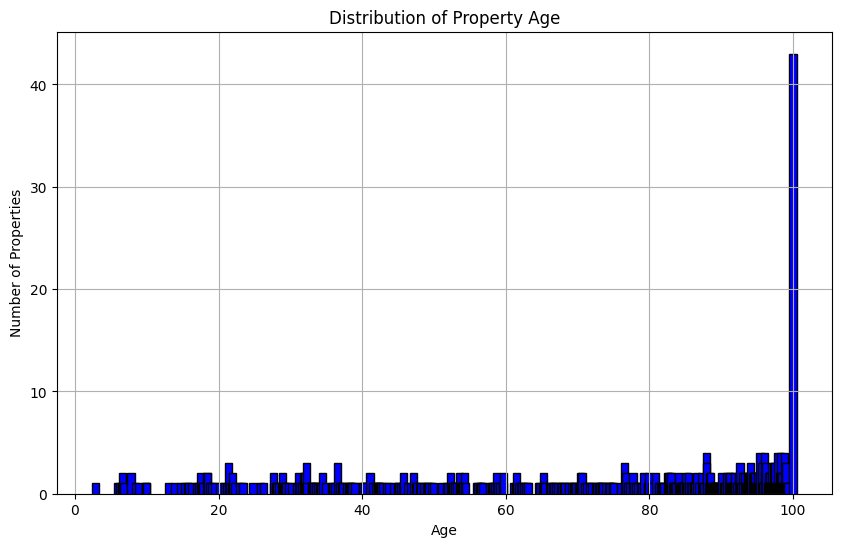

In [27]:
#task4
import matplotlib.pyplot as plt

ages = [row['age'] for row in age_data]
counts = [row['count'] for row in age_data]

plt.figure(figsize=(10, 6))
plt.bar(ages, counts, width=1.0, color='blue', edgecolor='black')
plt.title('Distribution of Property Age')
plt.xlabel('Age')
plt.ylabel('Number of Properties')
plt.grid(True)
plt.show()


In [28]:
#TASK4
chas_percentage = spark.sql("""
    SELECT (COUNT(*) / (SELECT COUNT(*) FROM bostonh.bos_housing) * 100) AS percentage_chas_1
    FROM bostonh.bos_housing
    WHERE chas = 1
""")
chas_percentage.show()


+-----------------+
|percentage_chas_1|
+-----------------+
| 6.91699604743083|
+-----------------+



In [30]:
#task5
cor_rm_medv = spark.sql("""
    SELECT corr(rm, medv) AS cor_rm_medv
    FROM bostonh.bos_housing
""")
cor_rm_medv.show()


+------------------+
|       cor_rm_medv|
+------------------+
|0.6953599470715401|
+------------------+



In [31]:
#task5
pt_nox_medv = spark.sql("""
    SELECT corr(ptratio, nox) AS pt_nox_medv
    FROM bostonh.bos_housing
""")
pt_nox_medv.show()

+-------------------+
|        pt_nox_medv|
+-------------------+
|0.18893267711276893|
+-------------------+



In [ ]:
#task5-report
#Since the correlation ratio is 0.1889 between ptratio and nox, which means that there is positive correlation.
#However, since the correlation ratio is closer to 0 instead of 1 or -1, which means they only have very little correlation.

In [41]:
#TASK6
top5_nb = spark.sql(
    """
        SELECT *
        FROM bostonh.bos_housing
        ORDER BY medv DESC
        LIMIT 5
"""
)
top5_nb.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [42]:
#task6
property_age = spark.sql(
    """
        SELECT chas, AVG(age) AS avg_age
        FROM bostonh.bos_housing
        GROUP BY chas
"""
)
property_age.show()


+----+-----------------+
|chas|          avg_age|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



In [45]:
#TASK 7
property_age_view = spark.sql(
    """
        CREATE OR REPLACE VIEW property_age_view AS
        SELECT medv, age
        FROM bostonh.bos_housing
"""
)

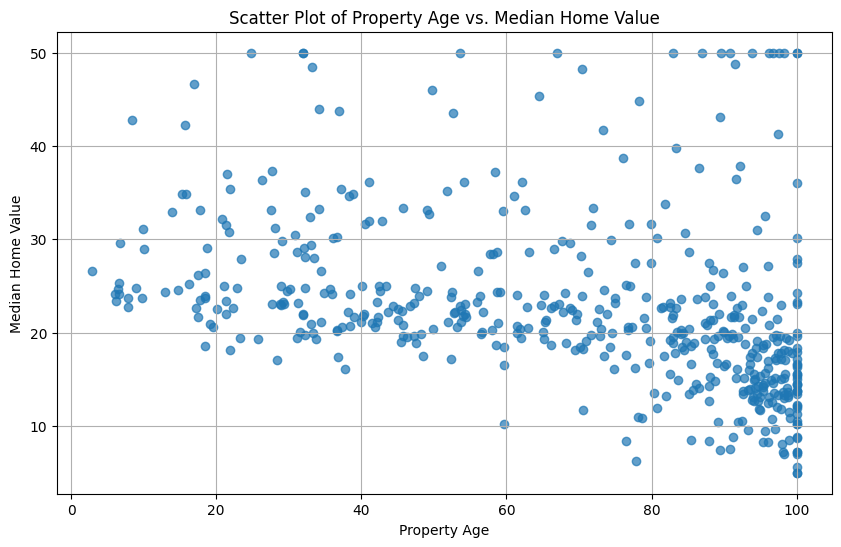

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

housing_data = spark.table("property_age_view").toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(housing_data['age'], housing_data['medv'], alpha=0.7)
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.title('Scatter Plot of Property Age vs. Median Home Value')
plt.grid(True)
plt.show()

In [47]:
#task8
crim_outliers = spark.sql(
    """
        SELECT *
        FROM bostonh.bos_housing
        WHERE crim > 10
"""
)
crim_outliers.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

task 8 analysis:
Outliers can significantly skew mean values and distort the overall distribution of data, leading to misleading conclusions. For instance, a high crime rate might drastically affect the average, making an area appear more unsafe than it truly is based on most of its data points.
In addition, if we going to use the data with ourliers to conduct predictive analysis. Outliers can affect the model’s performance, especially in regression analyses where extreme values can heavily influence the line of best fit.

In [48]:
#task9
rm_medv_corr = spark.sql(
    """
        SELECT corr(rm, medv) AS rm_medv_corr
        FROM bostonh.bos_housing
"""
)
rm_medv_corr.show()

+------------------+
|      rm_medv_corr|
+------------------+
|0.6953599470715401|
+------------------+



Null Hypothesis (H0): There is no statistically significant relationship between the average number of rooms and the median home value.

Alternative Hypothesis (H1): There is a statistically significant relationship between the average number of rooms and the median home value
.

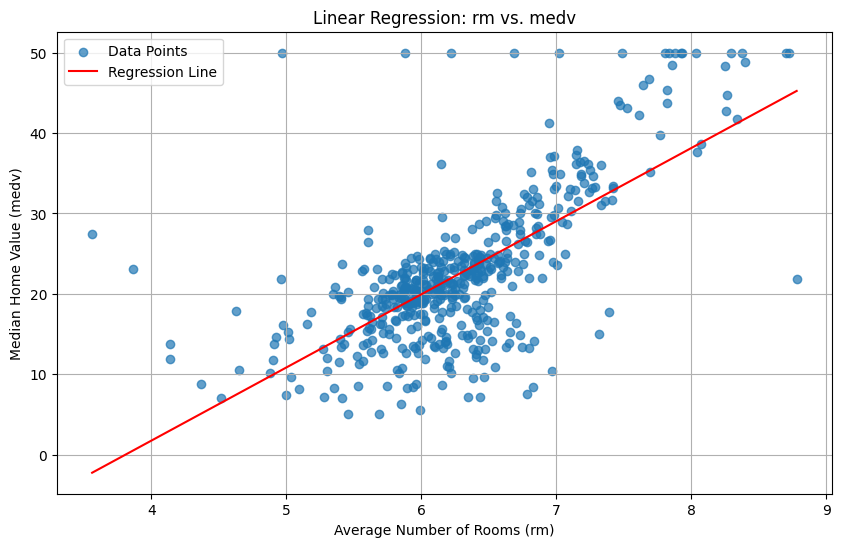

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

rm_medv = spark.sql("SELECT rm, medv FROM bostonh.bos_housing").toPandas()

# Fit a linear regression model
model = sm.ols('medv ~ rm', data=rm_medv).fit()

# Get the regression coefficients
intercept = model.params['Intercept']
slope = model.params['rm']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rm_medv['rm'], rm_medv['medv'], alpha=0.7, label='Data Points')

# Plot the regression line
x_range = [rm_medv['rm'].min(), rm_medv['rm'].max()]
y_range = [intercept + slope * x for x in x_range]
plt.plot(x_range, y_range, color='red', label='Regression Line')

# Customize the plot
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Home Value (medv)')
plt.title('Linear Regression: rm vs. medv')
plt.grid(True)
plt.legend()
plt.show()

Report

Overview

*  This analysis explores the relationship between the average number of rooms (rm) and its median home value (medv). The Pearson correlation coefficient was calculated, and a linear regression was performed to visualize this relationship.


Methodology

*  Data: The analysis utilized the Boston Housing dataset, accessed through HiveQL to execute integration and manipulation of large-scale data.

* Statistical Tools: The Pearson correlation coefficient and linear regression analysis were employed to quantify the relationship between variables.

* Data Retrieval and Preprocessing:
The data was queried using HiveQL with the following command:


```
        SELECT corr(rm, medv) AS rm_medv_corr
        FROM bostonh.bos_housing
"""

```
* Python Libraries and Code Execution:
The retrieved data was converted to a Pandas DataFrame for further analysis.
The Python libraries used included:
matplotlib.pyplot for plotting graphs,
pandas for data manipulation,
and statsmodels.formula.api for conducting regression analysis.

Results
* Pearson Correlation Coefficient: A coefficient of 0.6954 suggests a moderately strong positive linear relationship between the number of rooms and median home value.
* Linear Regression: The regression line in the scatter plot confirms the positive trend, showing an increase in median home value as the number of rooms increases.

Hypothesis Testing
* Null Hypothesis (H0): There is no statistically significant relationship between the average number of rooms and the median home value.
* Alternative Hypothesis (H1): There is a statistically significant relationship between the average number of rooms and the median home value.
* The correlation coefficient and the visual evidence from the regression line suggest rejecting the null hypothesis in favor of the alternative, indicating a statistically significant relationship.

Insights
* Impact of Room Count: The number of rooms is a significant predictor of home value in the Boston housing market, which can be crucial for various stakeholders in real estate and urban planning.
* Real Estate Valuation: Including the number of rooms as a key feature in predictive models can improve accuracy in real estate valuation and pricing strategies.


Key Takeaways
 * The analysis confirms the importance of room count as a determinant of property value. Enhancements in room count in properties could potentially increase their value. Further analysis could include additional variables such as location, amenities, and economic factors to understand their combined impact on home values comprehensively.

Conclusion
* The correlation and regression analysis provides strong evidence that more rooms typically lead to higher home values, offering valuable insights for strategic decisions in housing markets. Future studies should consider a broader set of factors to capture the dynamics of real estate valuation more comprehensively.